In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np

from sklearn import linear_model, model_selection, metrics, datasets
from matplotlib.colors import ListedColormap

In [6]:
# get dataset with 2 features - 1 informative and 1 redundant
#   add noise and says that we want to get a expression (coef arg)

data, target, coef = datasets.make_regression(n_features=2, n_informative=1, n_targets=1, noise=5., coef=True, random_state=2)

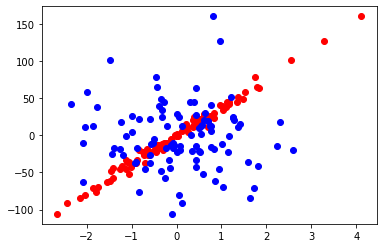

In [7]:
pylab.scatter(data[:, 0], target, color='r')
pylab.scatter(data[:, 1], target, color='b')


Text(0.5, 1.0, 'Feature 2 distribution')

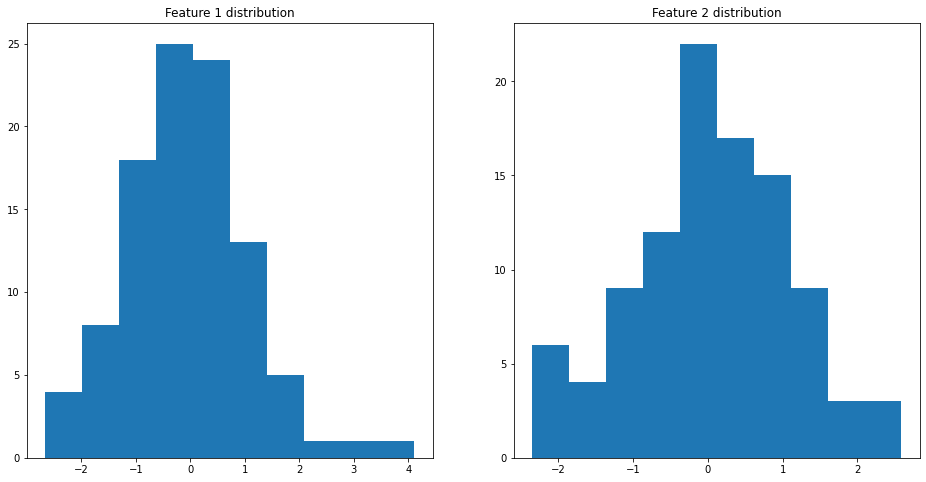

In [21]:
pyplot.figure(figsize(16, 8))

pyplot.subplot(1, 2, 1)
pyplot.hist(data[:, 0])
pyplot.title('Feature 1 distribution')

pyplot.subplot(1, 2, 2)
pyplot.hist(data[:, 1])
pyplot.title('Feature 2 distribution')

In [22]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target, test_size=0.3)

In [23]:
lin_reg = linear_model.LinearRegression()

In [24]:
lin_reg.fit(train_data, train_labels)

LinearRegression()

In [25]:
linreg_preds = lin_reg.predict(test_data)

In [26]:
linreg_preds

array([ 51.85424315,  56.90213387, -15.1017237 , -16.48865472,
       -54.67969531, -35.15821494,   8.77180262, -10.00589661,
       -16.50112167, -41.2013002 ,  -0.89805519,  13.5644724 ,
       -17.69837202,  18.04432863,   8.75778204,  22.26818887,
        22.75503032,  -7.85072072, -18.0559903 , -56.68617387,
        13.28189514,  22.65866396,  16.3585164 ,  19.66572932,
       -66.33143987, -41.81065726,  21.22858161, -44.03003644,
       -22.7659044 , -11.31522018])

In [27]:
test_labels

array([ 51.87072011,  58.26281761, -13.99339669, -13.26392817,
       -57.46293828, -37.31870104,   4.45578287, -15.01435792,
       -16.85466265, -36.44717565,  -1.42235396,  11.96165156,
       -22.64686884,  18.17188553,  10.33267887,  28.15553021,
        27.83791274, -10.27758354, -21.47606913, -61.47026695,
        20.87713077,  24.47584129,  21.20540389,  22.13032804,
       -70.11132234, -35.32062686,  17.64282734, -45.38589148,
       -22.32195021, -10.29545833])

In [28]:
metrics.mean_absolute_error(test_labels, linreg_preds)

2.9621518659315664

In [30]:
linear_scoring = model_selection.cross_val_score(lin_reg, data, target, scoring='neg_mean_absolute_error', cv=10)

In [32]:
print(f"""LinReg
    mean: {linear_scoring.mean()}
    std: {linear_scoring.std()}""")

LinReg
    mean: -4.070071498779699
    std: 1.073710449289019


In [33]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)

In [34]:
linear_scoring = model_selection.cross_val_score(lin_reg, data, target, scoring=scorer, cv=10)

print(f"""LinReg
    mean: {linear_scoring.mean()}
    std: {linear_scoring.std()}""")

LinReg
    mean: 4.070071498779699
    std: 1.073710449289019


In [35]:
coef

array([38.07925837,  0.        ])

In [36]:
lin_reg.coef_

array([38.03908785,  0.37783633])

In [37]:
# lasso regression - lin reg with l1 regularization

lasso_reg = linear_model.Lasso(random_state=1)
lasso_reg.fit(train_data, train_labels)
lasso_preds = lasso_reg.predict(test_data)

In [38]:
lasso_scoring = model_selection.cross_val_score(lasso_reg, data, target, scoring=scorer, cv=10)

In [40]:
print(f"""LassoReg
    mean: {lasso_scoring.mean()}
    std: {lasso_scoring.std()}""")

LassoReg
    mean: 4.154478246666397
    std: 1.0170354384993354


In [41]:
lasso_reg.coef_

array([37.37565018,  0.        ])

In [42]:
# l1 regularization selects dependent features and they equal to 0